# IMPORT LIBRARIES AND DOWNLOAD DATA

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import rasterio
import os
print(f'CURRENT WORKING DIRECTORY: {os.getcwd()}')

CURRENT WORKING DIRECTORY: c:\Users\ruben\OneDrive - Universidad Rey Juan Carlos\projects\home\Home\Where


In [25]:
##### GET THE DATA
# https://earthexplorer.usgs.gov/ (GTOPO30 recommended)
# https://gisgeography.com/free-global-dem-data-sources/
# Path to the GTOPO30 dataset
gtopo30_path = "./data/gt30w020n90.tif"

# Open the GTOPO30 dataset using rasterio
dataset = rasterio.open(gtopo30_path)
height_data = dataset.read(1)

Dataset Information:
DATASET: <open DatasetReader name='./data/gt30w020n90.tif' mode='r'>
DATASET ATTRIBUTES: {'driver': 'GTiff', 'dtype': 'int16', 'nodata': -9999.0, 'width': 4800, 'height': 6000, 'count': 1, 'crs': CRS.from_epsg(4326), 'transform': Affine(0.00833333333333, 0.0, -19.999999999999996,
       0.0, -0.00833333333333, 90.0)}
Dimensions (Height, Width): 6000 4800
Spatial Resolution (X, Y): (0.00833333333333, 0.00833333333333)
Bounding Box: BoundingBox(left=-19.999999999999996, bottom=40.000000000019995, right=19.99999999998401, top=90.0)
Coordinate Reference System (CRS): EPSG:4326


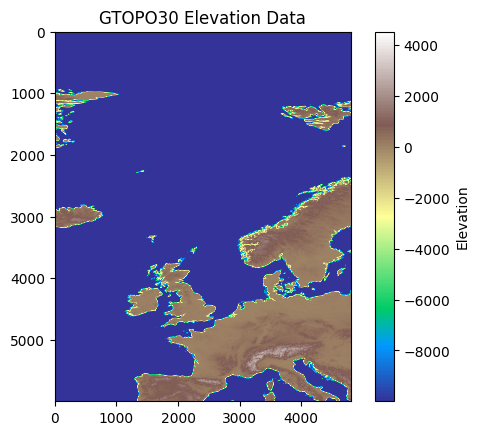

In [30]:
#### INSPECT THE DATA

# Print general information about the dataset
print("Dataset Information:")
print(f'DATASET: {dataset}')
print(f'DATASET ATTRIBUTES: {dataset.meta}')

# Print the dimensions of the dataset (height and width)
print("Dimensions (Height, Width):", dataset.height, dataset.width)

# Print the spatial resolution of the dataset
print("Spatial Resolution (X, Y):", dataset.res)

# Print the bounding box of the dataset
print("Bounding Box:", dataset.bounds)

# Print the coordinate reference system (CRS) of the dataset
print("Coordinate Reference System (CRS):", dataset.crs)

# Optionally, you can visualize the dataset using plt.imshow()
import matplotlib.pyplot as plt
plt.imshow(band, cmap='terrain')
plt.colorbar(label='Elevation')
plt.title('GTOPO30 Elevation Data')
plt.show()


In [13]:
# Create masks
concave_mask = np.zeros_like(height_data, dtype=bool)
tall_mask = height_data > 500
tall_heights = np.ma.masked_where(~tall_mask, height_data) # True = Mask it!

# ALGORITHMS

In [23]:
# Highest point

max_value = 0  # Initialize maximum value
max_row = -1   # Initialize row index
max_col = -1   # Initialize column index

# for row_idx, row in enumerate(height_data):
#     for col_idx, point in enumerate(row):
#         if not np.ma.is_masked(point) and point > max_value:
#             max_value = point
#             max_row = row_idx
#             max_col = col_idx

print(f"Highest Point: {max_value} meters")
print(f"Coordinates: Row {max_row}, Column {max_col}")

max_value = 4536
max_row = 5300
max_col = 3223

with rasterio.open(gtopo30_path) as dataset:
    lon, lat = dataset.transform * (max_col, max_row)
print(f'coords: ({lat}, {lon})')

Highest Point: 0 meters
Coordinates: Row -1, Column -1
coords: (45.83333333335099, 6.858333333322594)


In [24]:
dataset.meta

{'driver': 'GTiff',
 'dtype': 'int16',
 'nodata': -9999.0,
 'width': 4800,
 'height': 6000,
 'count': 1,
 'crs': CRS.from_epsg(4326),
 'transform': Affine(0.00833333333333, 0.0, -19.999999999999996,
        0.0, -0.00833333333333, 90.0)}

# Plot

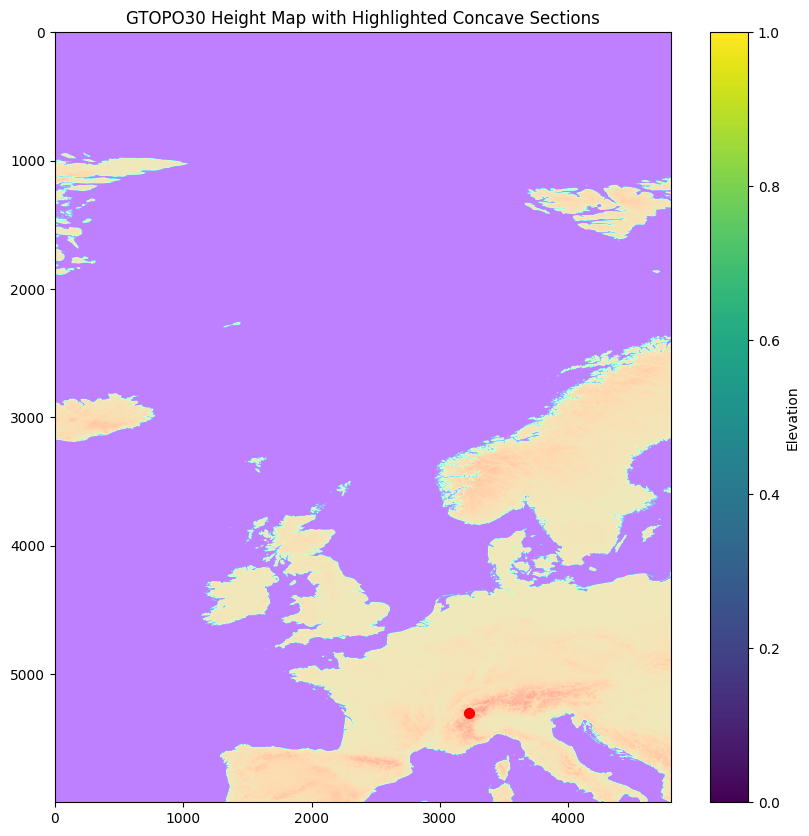

In [15]:
plt.figure(figsize=(10, 10))
# plt.imshow(height_data, cmap='rainbow') # terrain
plt.imshow(height_data, cmap='rainbow', alpha=0.5)  # Highlighted concave sections
plt.scatter(max_col, max_row, color='red', marker='o', s=50, label='Highest Point')
plt.colorbar(label='Elevation')
plt.title('GTOPO30 Height Map with Highlighted Concave Sections')
plt.show()


# TODO
- Filter by coordinates
- Filter by concavity
- Filter by weather:
    - average rainfall
    - cloud coverage
    - average temperature
    - average humidity
    - max and min temperatures
- Cold air flow
- Fire flow
- Hill orientation
- Visibility